In [1]:
# idk what this is but here we go
import pandas as pd

df = pd.read_csv('/Users/aryaan/Desktop/Projects/Analyzing_311_calls/311 Cases 2020_2024 Unrestricted.csv') # replace this with your path to this file

/var/folders/bt/z1v72bys2q95yjy88m70143m0000gn/T/ipykernel_34100/312834653.py:4: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/aryaan/Desktop/Projects/Analyzing_311_calls/311 Cases 2020_2024 Unrestricted.csv') # replace this with your path to this file


In [2]:
df.head()

,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,Y,...,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT
0,1.010030e+11,01/01/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,42.344290,...,1,0,0,0,0,1,0,1,1,12/03/20
1,1.010030e+11,01/01/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,42.282010,...,1,0,0,0,0,1,0,1,1,13/01/20
2,1.010030e+11,01/01/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,42.282298,...,1,0,0,0,0,0,0,0,0,13/01/20
3,1.010030e+11,01/01/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,42.235530,...,1,0,0,0,0,0,0,0,0,18/01/20
4,1.010030e+11,01/01/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,42.310860,...,1,0,0,0,0,0,0,0,0,02/01/20


In [3]:
# not really important, just seeing what columns exist in df
list(df.columns)

['CASE_ENQUIRY_ID',
 'OPEN_DT',
 'SUBJECT',
 'REASON',
 'TYPE',
 'LOCATION',
 'propid',
 'SOURCE',
 'X',
 'Y',
 'LocationID',
 'ObjectID',
 'TLID',
 'BLK_ID_10',
 'BG_ID_10',
 'CT_ID_10',
 'NSA_NAME',
 'BRA_PD',
 'PUBLIC',
 'HOUSING',
 'UNCIVILUSE',
 'BIGBUILD',
 'GRAFFITI',
 'TRASH',
 'PRIVATENEGLECT',
 'PUBLICDENIG',
 'PROBLEM',
 'CLOSED_DT']

In [4]:
# also not important, just seeing the size
df.size

17414992

In [5]:
# break up the 'LOCACTION' column into four separate columns:
# 'STREET NAME' 'CITY' 'STATE' 'ZIP CODE'

# define a regular expression pattern to match an address
pattern = r'(?P<Street_Name>[0-9A-Za-z\s]+),\s*(?P<City>[A-Za-z\s]+),?\s*(?P<State>[A-Za-z]{2})?\s*(?P<Zip_Code>[0-9]{5})?'

# split the 'LOCATION' column into four separate columns using the regular expression pattern
df[['STREET NAME', 'CITY', 'STATE', 'ZIP CODE']] = df['LOCATION'].str.extract(pattern)

In [6]:
df.head()

,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,Y,...,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT,STREET NAME,CITY,STATE,ZIP CODE
0,1.010030e+11,01/01/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,42.344290,...,0,1,0,1,1,12/03/20,70 Burbank St,Boston,MA,02115
1,1.010030e+11,01/01/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,42.282010,...,0,1,0,1,1,13/01/20,461 Gallivan Blvd,Dorchester,MA,02124
2,1.010030e+11,01/01/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,42.282298,...,0,0,0,0,0,13/01/20,Gallivan Blvd,Dorchester,MA,NaN
3,1.010030e+11,01/01/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,42.235530,...,0,0,0,0,0,18/01/20,10 Stanbro St,Hyde Park,MA,02136
4,1.010030e+11,01/01/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,42.310860,...,0,0,0,0,0,02/01/20,8 Pleasanton St,Dorchester,MA,02121


In [7]:
# create a df subset that only takes into account address and case enquiry id
df2 = df[['CASE_ENQUIRY_ID', 'LOCATION', 'STREET NAME', 'CITY', 'STATE', 'ZIP CODE']]

In [8]:
df2.head()

,CASE_ENQUIRY_ID,LOCATION,STREET NAME,CITY,STATE,ZIP CODE
0,1.010030e+11,"70 Burbank St, Boston, MA 02115",70 Burbank St,Boston,MA,02115
1,1.010030e+11,"461 Gallivan Blvd, Dorchester, MA 02124",461 Gallivan Blvd,Dorchester,MA,02124
2,1.010030e+11,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",Gallivan Blvd,Dorchester,MA,NaN
3,1.010030e+11,"10 Stanbro St, Hyde Park, MA 02136",10 Stanbro St,Hyde Park,MA,02136
4,1.010030e+11,"8 Pleasanton St, Dorchester, MA 02121",8 Pleasanton St,Dorchester,MA,02121


In [9]:
# drop location
df2 = df2.drop('LOCATION', axis = 1)

In [10]:
df2.head()

,CASE_ENQUIRY_ID,STREET NAME,CITY,STATE,ZIP CODE
0,1.010030e+11,70 Burbank St,Boston,MA,02115
1,1.010030e+11,461 Gallivan Blvd,Dorchester,MA,02124
2,1.010030e+11,Gallivan Blvd,Dorchester,MA,NaN
3,1.010030e+11,10 Stanbro St,Hyde Park,MA,02136
4,1.010030e+11,8 Pleasanton St,Dorchester,MA,02121


In [11]:
# not important, just curious
df2.size

3109820

In [12]:
# save into its own csv
df2.to_csv('extracted.csv', index = False)

In [13]:
df2.size

3109820

### NOTE:
In order for us to use this csv in the census website, we need to make it smaller. The dataset is too large for the website to handle. (I tried it and it timed out.) Probably breaking up the dataset into chunks of 10,000 works, so I'm going to start from there and see what happens.

In [14]:
import os
# break up df subset into smaller chunks
def splitIntoSmaller(df, chunksize = 10, output_folder = './output'): # 10 for default
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    numChunks = len(df) // chunksize + 1
    for i in range(numChunks):
        output_file = os.path.join(output_folder, f'df_chunk_{i}.csv')
        df_subset = df[i * chunksize : (i + 1) * chunksize]
        df_subset.to_csv(output_file, index=False)
        
df2_split = splitIntoSmaller(df2, chunksize=9999, output_folder='./output')

In [16]:
temp1 = pd.read_csv("/Users/aryaan/Desktop/Projects/Analyzing_311_calls/gr_0.csv")

In [17]:
temp1.columns = ["CASE_ENQUIRY_ID", "INPUT ADDRESS", "MATCH INDICATOR", "MATCH TYPE", "OUTPUT ADDRESS", "COORDINATES", "TIGERLINE ID", "TIGERLINE ID SIDE", "STATE CODE", "COUNTY CODE", "TRACT CODE", "BLOCK CODE"]
temp1.head()

,CASE_ENQUIRY_ID,INPUT ADDRESS,MATCH INDICATOR,MATCH TYPE,OUTPUT ADDRESS,COORDINATES,TIGERLINE ID,TIGERLINE ID SIDE,STATE CODE,COUNTY CODE,TRACT CODE,BLOCK CODE
0,101003150529,"552 Beech St, Roslindale, MA, 02131",Match,Exact,"552 BEECH ST, ROSLINDALE, MA, 02131","-71.13037666699995,42.27412014300006",85703666.0,L,25.0,25.0,110403.0,5002.0
1,101003151859,"51 Redlands Rd, West Roxbury, MA, 02132",Match,Exact,"51 REDLANDS RD, WEST ROXBURY, MA, 02132","-71.15217810199994,42.28889386600008",85702739.0,R,25.0,25.0,130200.0,2003.0
2,101003149540,"105 Buttonwood St, Dorchester, MA, 02125",Match,Exact,"105 BUTTONWOOD ST, DORCHESTER, MA, 02125","-71.05587282899995,42.322503776000076",85712586.0,R,25.0,25.0,90700.0,1002.0
3,101003149541,"7 Iroquois St, Mission Hill, MA, 02120",Match,Exact,"7 IROQUOIS ST, MISSION HILL, MA, 02120","-71.10314878499997,42.329842892000045",645436818.0,R,25.0,25.0,81001.0,1001.0
4,101003149542,"120 Buttonwood St, Dorchester, MA, 02125",Match,Exact,"120 BUTTONWOOD ST, DORCHESTER, MA, 02125","-71.05588546399997,42.32221181800003",85712586.0,L,25.0,25.0,90700.0,1003.0


In [18]:
# break up the 'LOCACTION' column into four separate columns:
# 'STREET NAME' 'CITY' 'STATE' 'ZIP CODE'

# define a regular expression pattern to match an address
pattern = r'(?P<Street_Name>[0-9A-Za-z\s]+),\s*(?P<City>[A-Za-z\s]+),?\s*(?P<State>[A-Za-z]{2}),?\s*(?P<Zip_Code>[0-9]{5})?'

# split the 'LOCATION' column into four separate columns using the regular expression pattern
temp1[['STREET NAME', 'CITY', 'STATE', 'ZIP CODE']] = temp1['INPUT ADDRESS'].str.extract(pattern)

In [19]:
temp1.head()

,CASE_ENQUIRY_ID,INPUT ADDRESS,MATCH INDICATOR,MATCH TYPE,OUTPUT ADDRESS,COORDINATES,TIGERLINE ID,TIGERLINE ID SIDE,STATE CODE,COUNTY CODE,TRACT CODE,BLOCK CODE,STREET NAME,CITY,STATE,ZIP CODE
0,101003150529,"552 Beech St, Roslindale, MA, 02131",Match,Exact,"552 BEECH ST, ROSLINDALE, MA, 02131","-71.13037666699995,42.27412014300006",85703666.0,L,25.0,25.0,110403.0,5002.0,552 Beech St,Roslindale,MA,02131
1,101003151859,"51 Redlands Rd, West Roxbury, MA, 02132",Match,Exact,"51 REDLANDS RD, WEST ROXBURY, MA, 02132","-71.15217810199994,42.28889386600008",85702739.0,R,25.0,25.0,130200.0,2003.0,51 Redlands Rd,West Roxbury,MA,02132
2,101003149540,"105 Buttonwood St, Dorchester, MA, 02125",Match,Exact,"105 BUTTONWOOD ST, DORCHESTER, MA, 02125","-71.05587282899995,42.322503776000076",85712586.0,R,25.0,25.0,90700.0,1002.0,105 Buttonwood St,Dorchester,MA,02125
3,101003149541,"7 Iroquois St, Mission Hill, MA, 02120",Match,Exact,"7 IROQUOIS ST, MISSION HILL, MA, 02120","-71.10314878499997,42.329842892000045",645436818.0,R,25.0,25.0,81001.0,1001.0,7 Iroquois St,Mission Hill,MA,02120
4,101003149542,"120 Buttonwood St, Dorchester, MA, 02125",Match,Exact,"120 BUTTONWOOD ST, DORCHESTER, MA, 02125","-71.05588546399997,42.32221181800003",85712586.0,L,25.0,25.0,90700.0,1003.0,120 Buttonwood St,Dorchester,MA,02125


In [20]:
temp2 = pd.read_csv("/Users/aryaan/Desktop/Projects/Analyzing_311_calls/gr_1.csv")

In [21]:
temp2.columns = ["CASE_ENQUIRY_ID", "INPUT ADDRESS", "MATCH INDICATOR", "MATCH TYPE", "OUTPUT ADDRESS", "COORDINATES", "TIGERLINE ID", "TIGERLINE ID SIDE", "STATE CODE", "COUNTY CODE", "TRACT CODE", "BLOCK CODE"]
temp2.head()

,CASE_ENQUIRY_ID,INPUT ADDRESS,MATCH INDICATOR,MATCH TYPE,OUTPUT ADDRESS,COORDINATES,TIGERLINE ID,TIGERLINE ID SIDE,STATE CODE,COUNTY CODE,TRACT CODE,BLOCK CODE
0,101003175828,"10C Greenwood St, Dorchester, MA, 02121",Tie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101003175821,"21 Perthshire Rd, Brighton, MA, 02135",Match,Exact,"21 PERTHSHIRE RD, BRIGHTON, MA, 02135","-71.16624221699993,42.35353959300005",636133413.0,R,25.0,25.0,301.0,1007.0
2,101003175820,"25 Salem St, Charlestown, MA, 02129",Match,Exact,"25 SALEM ST, CHARLESTOWN, MA, 02129","-71.06610461999998,42.377603889000056",85722231.0,R,25.0,25.0,40401.0,1009.0
3,101003175823,"8 Wyvern St, Roslindale, MA, 02131",Match,Exact,"8 WYVERN ST, ROSLINDALE, MA, 02131","-71.11780968899996,42.28879186100005",85703859.0,L,25.0,25.0,110301.0,2008.0
4,101003175822,"Portsmouth St, Brighton, MA,",No_Match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
mergedTemp = pd.merge(temp1, temp2, on='CASE_ENQUIRY_ID')

In [69]:
print(numFiles)

10


In [79]:
#dfNew = pd.DataFrame()

#for filename in os.listdir('extra'):
#    if filename.endswith('csv'):
#        filePath = os.path.join('extra', filename)
#        temp = pd.read_csv(filePath)
#        dfNew = pd.concat([dfNew, temp])

#dfNew = dfNew.reset_index(drop = True)

In [80]:
dfNew = pd.read_csv("311 Cases with Blocks.csv")

In [81]:
dfNew.head()

,Unnamed: 0,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,...,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT,BLOCK_ID
0,0,1.010030e+11,1/1/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,...,0,0,0,0,1,0,1,1,3/12/20,NaN
1,1,1.010030e+11,1/1/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,...,0,0,0,0,1,0,1,1,1/13/20,5005.0
2,2,1.010030e+11,1/1/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,...,0,0,0,0,0,0,0,0,1/13/20,NaN
3,3,1.010030e+11,1/1/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,...,0,0,0,0,0,0,0,0,1/18/20,2018.0
4,4,1.010030e+11,1/1/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,...,0,0,0,0,0,0,0,0,1/2/20,3006.0


In [82]:
# break up the 'LOCACTION' column into four separate columns:
# 'STREET NAME' 'CITY' 'STATE' 'ZIP CODE'

# define a regular expression pattern to match an address
pattern = r'(?P<Street_Name>[0-9A-Za-z\s]+),\s*(?P<City>[A-Za-z\s]+),?\s*(?P<State>[A-Za-z]{2})?\s*(?P<Zip_Code>[0-9]{5})?'

# split the 'LOCATION' column into four separate columns using the regular expression pattern
dfNew[['STREET NAME', 'CITY', 'STATE', 'ZIP CODE']] = dfNew['LOCATION'].str.extract(pattern)

In [83]:
dfNew.head()

,Unnamed: 0,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,...,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT,BLOCK_ID,STREET NAME,CITY,STATE,ZIP CODE
0,0,1.010030e+11,1/1/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,...,1,0,1,1,3/12/20,NaN,70 Burbank St,Boston,MA,02115
1,1,1.010030e+11,1/1/20,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,...,1,0,1,1,1/13/20,5005.0,461 Gallivan Blvd,Dorchester,MA,02124
2,2,1.010030e+11,1/1/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,...,0,0,0,0,1/13/20,NaN,Gallivan Blvd,Dorchester,MA,NaN
3,3,1.010030e+11,1/1/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,...,0,0,0,0,1/18/20,2018.0,10 Stanbro St,Hyde Park,MA,02136
4,4,1.010030e+11,1/1/20,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,...,0,0,0,0,1/2/20,3006.0,8 Pleasanton St,Dorchester,MA,02121


In [85]:
# checking to see how many NaNs exist in CLOSED_DT
numNan = dfNew['CLOSED_DT'].isna().sum()
print(numNan)

1118


In [86]:
dfNew.shape[0]

10000

In [92]:
blockReason = dfNew.groupby('BLOCK_ID')['REASON'].size()
print(blockReason)

BLOCK_ID
1000.0    320
1001.0    335
1002.0    343
1003.0    343
1004.0    289
         ... 
7003.0      8
7004.0      1
7005.0      1
7006.0      3
7008.0      1
Name: REASON, Length: 175, dtype: int64


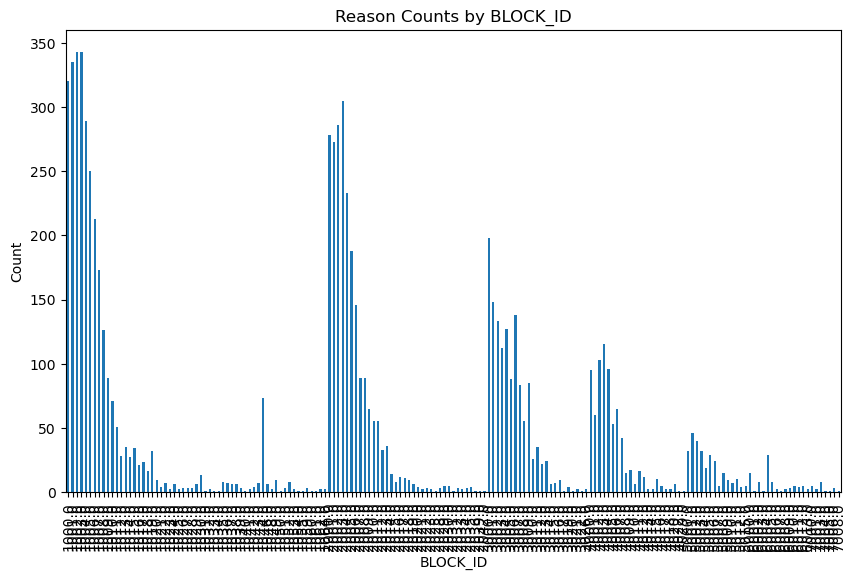

In [100]:
import matplotlib.pyplot as plt

ax = blockReason.plot(kind = 'bar', figsize=(10,6), xlabel='BLOCK_ID', ylabel='Count', title='Reason Counts by BLOCK_ID')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [94]:
frequency = pd.read_csv('type_block_freq.csv')

In [95]:
frequency.head()

,BLOCK_ID,TYPE,count
0,1001,Parking Enforcement,73
1,2003,Parking Enforcement,57
2,1002,Parking Enforcement,49
3,1004,Parking Enforcement,46
4,2002,Parking Enforcement,42


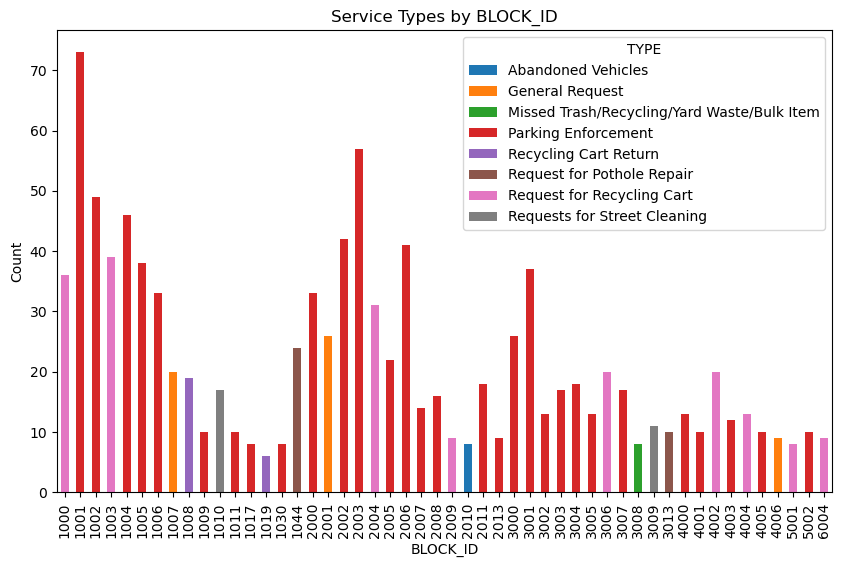

In [98]:
freqPivot = frequency.pivot(index = 'BLOCK_ID', columns = 'TYPE', values = 'count')

freqPivot.plot(kind = 'bar', stacked = True, figsize = (10,6), xlabel = 'BLOCK_ID', ylabel = 'Count', title = 'Service Types by BLOCK_ID')
plt.show()

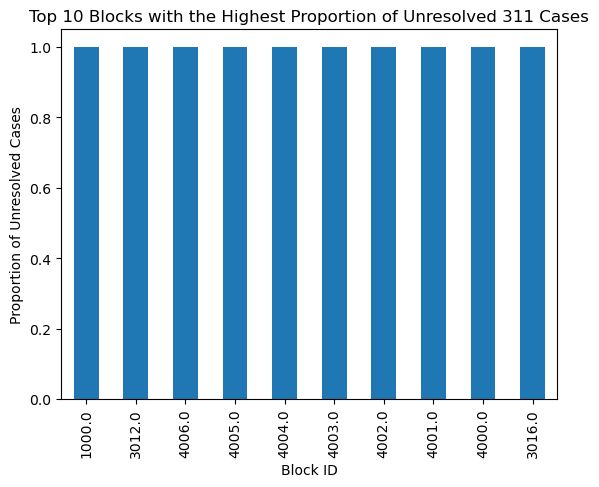

In [114]:
### Total number of cases unresolved per block 


dfNew_2  = dfNew.loc[(dfNew["CLOSED_DT"].isnull() != False)]


# Count the total number of unresolved cases per block
total_unresolved = dfNew_2.groupby('BLOCK_ID')['TYPE'].count()

# Count the total number of cases per block
total_cases = dfNew.groupby('BLOCK_ID')['TYPE'].count()

# Calculate the proportion of unresolved cases per block
proportion_unresolved = total_unresolved / total_cases

# Sort the proportion of unresolved cases in descending order and select top 10 rows
top_10_blocks = proportion_unresolved.sort_values(ascending=False).head(10)

# Plot top 10 blocks as a bar graph
top_10_blocks.plot(kind='bar')

# Set plot title and axis labels
plt.title('Top 10 Blocks with the Highest Proportion of Unresolved 311 Cases')
plt.xlabel('Block ID')
plt.ylabel('Proportion of Unresolved Cases')

# Show plot
plt.show()

# this is incorrect - will have to fix this in the future 


In [110]:

total_unresolved = dfNew_2.groupby('BLOCK_ID')['TYPE'].count()

print(total_unresolved)



BLOCK_ID
1000.0    29
1001.0    21
1002.0    22
1003.0    39
1004.0    24
          ..
6005.0     1
6012.0     1
7000.0     2
7004.0     1
7006.0     1
Name: TYPE, Length: 102, dtype: int64


BLOCK_ID
2002.0    40
1003.0    39
2001.0    36
3000.0    31
1000.0    29
2000.0    27
2004.0    25
1004.0    24
1002.0    22
1005.0    21
Name: TYPE, dtype: int64


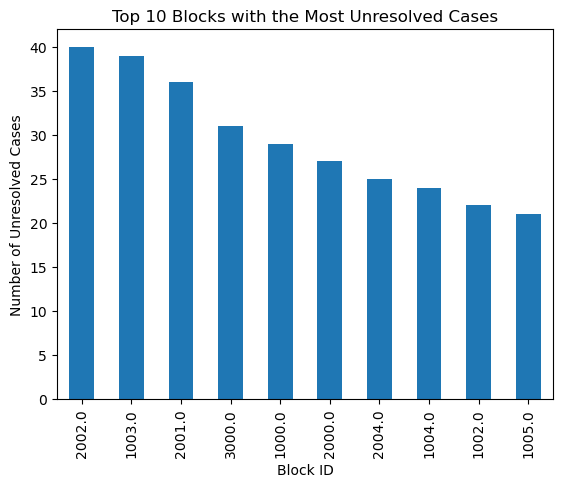

In [108]:

### top 10 most unresolved cases per block id 


# Sort total_unresolved in descending order and select top 10 rows
top_10_blocks = total_unresolved.sort_values(ascending=False).head(10)

print(top_10_blocks)

# Plot top 10 blocks as a bar graph
top_10_blocks.plot(kind='bar')

# Set plot title and axis labels
plt.title('Top 10 Blocks with the Most Unresolved Cases')
plt.xlabel('Block ID')
plt.ylabel('Number of Unresolved Cases')

# Show plot
plt.show()

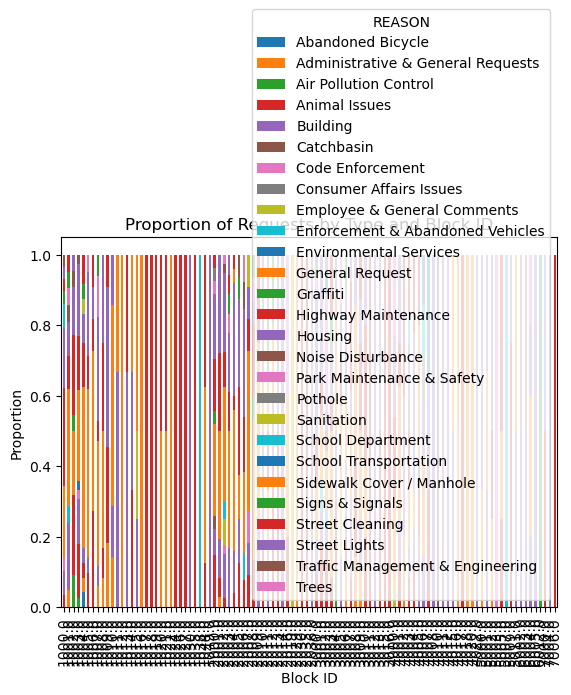

In [115]:
grouped_df = dfNew.groupby(['BLOCK_ID', 'REASON']).size().reset_index(name='Count')

# Pivot DataFrame to put request types as columns
pivoted_df = grouped_df.pivot(index='BLOCK_ID', columns='REASON', values='Count')

# Calculate proportions of each request type
proportions_df = pivoted_df.div(pivoted_df.sum(axis=1), axis=0)

# Create stacked bar graph
proportions_df.plot(kind='bar', stacked=True)

plt.xlabel('Block ID')
plt.ylabel('Proportion')
plt.title('Proportion of Requests by Type and Block ID')

plt.show()

# this is very congested - will have to fix this 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


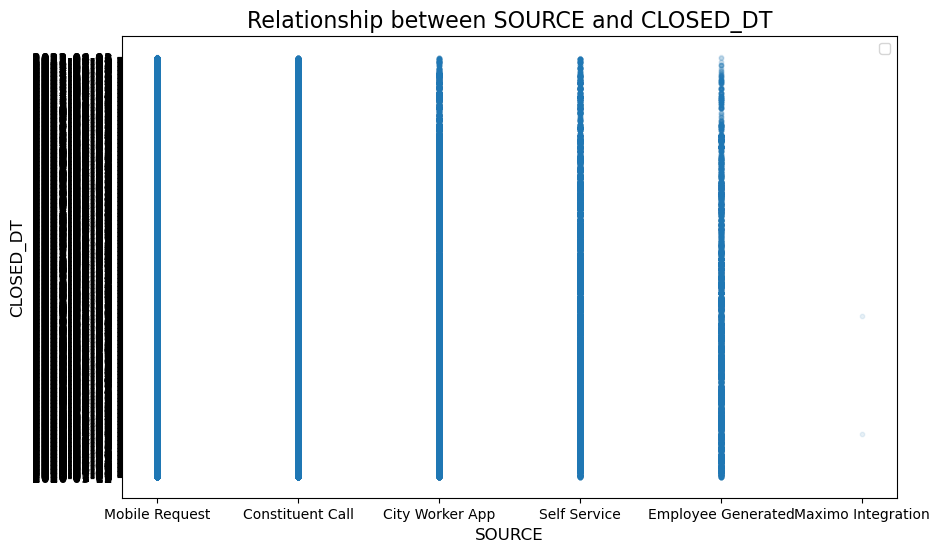

In [113]:
df = df.dropna(subset=['CLOSED_DT'])

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['SOURCE'], df['CLOSED_DT'], alpha=0.1, s=10)

# Add labels, titles, and legends to the plot
ax.set_xlabel('SOURCE', fontsize=12)
ax.set_ylabel('CLOSED_DT', fontsize=12)
ax.set_title('Relationship between SOURCE and CLOSED_DT', fontsize=16)
ax.legend()

# Show the plot
plt.show()

# this is also messy / congested - will have to fix this